<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-29/La2_3_b_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1233, done.
remote: Counting objects: 100% (523/523), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 1233 (delta 329), reused 281 (delta 177), pack-reused 710
Receiving objects: 100% (1233/1233), 80.49 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (698/698), done.
Updating files: 100% (163/163), done.


'/content'

### 24-07-25 La2/3-b gating

Gate voltage parameters :
- Amp : 5Vpp
- Offset : 500 mV
- Duty Cycle : 1%
- Power supply: 2V
Trying to tap off the gating electrode



In [3]:
%cd "/content/gator/data/07-29/"

/content/gator/data/07-29


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0729_143437.csv')
df = pd.read_csv('defbuffer1_0729_143437.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.017699,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999946,Volt DC,1,T,2W,F,F,0.000000
1,0.017699,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999948,Volt DC,1,T,2W,F,F,0.069348
2,0.017700,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999947,Volt DC,1,T,2W,F,F,0.138682
3,0.017700,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999948,Volt DC,1,T,2W,F,F,0.208016
4,0.017700,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999948,Volt DC,1,T,2W,F,F,0.277379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,0.018466,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999945,Volt DC,1,T,2W,F,F,183.866187
2652,0.018467,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999945,Volt DC,1,T,2W,F,F,183.935521
2653,0.018467,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999945,Volt DC,1,T,2W,F,F,184.004847
2654,0.018467,Amp DC,0.1,5.5,F,F,F,F,F,F,...,F,Main,1.999944,Volt DC,1,T,2W,F,F,184.074194


In [7]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e12

# Potential (mV)
V = df['Value'] * 1e3

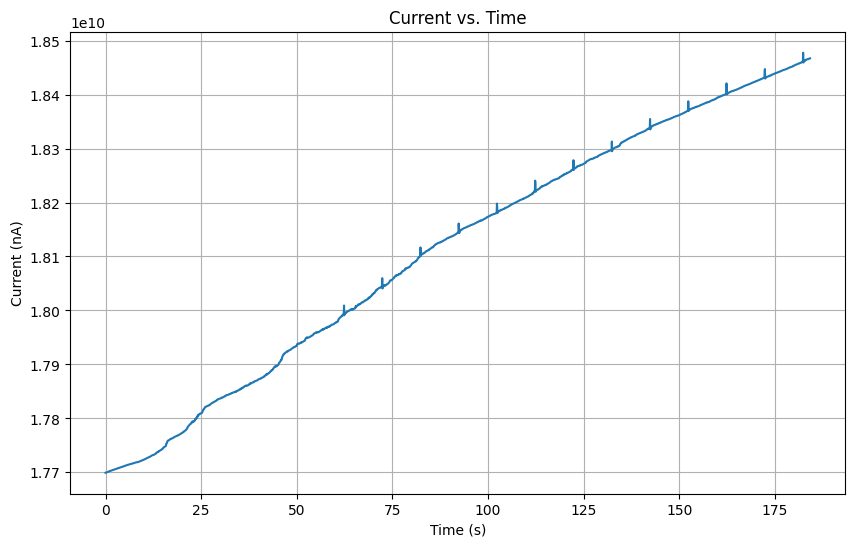

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(T, I)

plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.title('Current vs. Time')

plt.grid(True)
plt.show()


In [9]:
%cd "/content/gator/data/06-11"

/content/gator/data/06-11


In [10]:
prep_csv('switch.csv')
df = pd.read_csv('switch.csv')

Fill Mode,1



In [14]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e12
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


<ipython-input-14-05c1968da0ac>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()


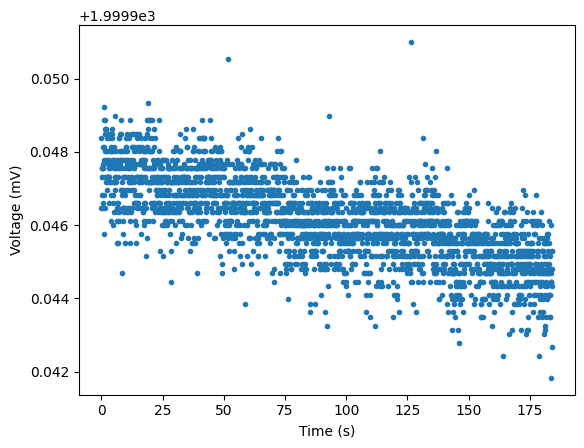

In [16]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

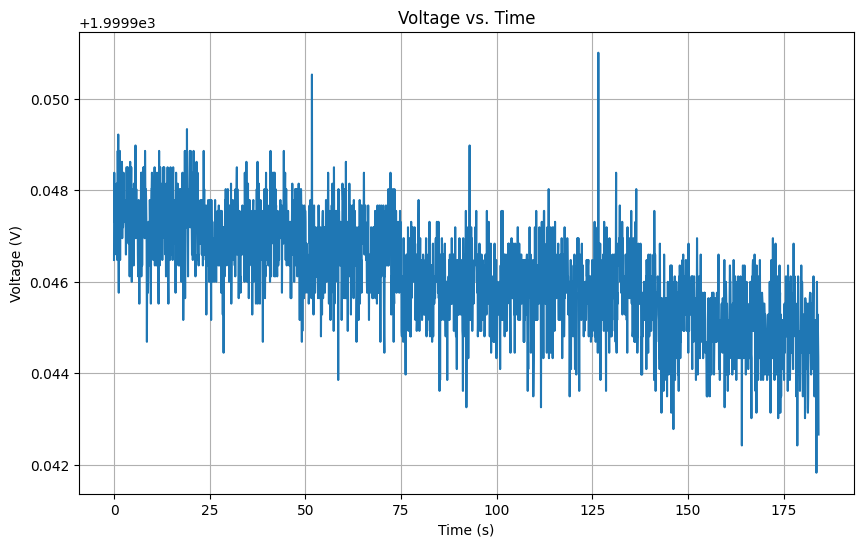

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(T, V)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

plt.title('Voltage vs. Time')

plt.grid(True)
plt.show()